In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from datetime import datetime
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import platform
import pickle as pkl

system = platform.system()

if system == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
else:
    !apt-get -y install fonts-nanum
    !fc-cache -fv
    !rm ~/.cache/matplotlib -rf

    plt.rcParams['font.family'] = 'NanumBarunGothic'


In [2]:
df_product = pd.read_csv('../data/dibidibi.product.csv')

## 결측치 / 이상치 처리

In [3]:
df_product = df_product.drop(columns='_id')

In [4]:
df_product = df_product.drop_duplicates()

In [5]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50874 entries, 0 to 50875
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   large_category_name  50874 non-null  object 
 1   small_category_name  50719 non-null  object 
 2   zzim                 50874 non-null  int64  
 3   product_name         50874 non-null  object 
 4   product_price        49240 non-null  float64
 5   product_event_price  49113 non-null  float64
 6   seller_name          50874 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 3.1+ MB


In [6]:
df_product.query('small_category_name.isna()')

,large_category_name,small_category_name,zzim,product_name,product_price,product_event_price,seller_name
28567,인테리어,NaN,1258,LED 별별 키즈방등,130000.0,128550.0,유캔라이팅
28568,인테리어,NaN,805,인테리어 특이한 무선 예쁜 플라밍고 무드등,18800.0,18462.0,리브하우스님의 스토어
28569,인테리어,NaN,663,퍽라이트 LED 무드등 매직램프 리모컨포함,17000.0,16680.0,유캔라이팅
28570,인테리어,NaN,624,무선 리모컨 LED 무드등 장식장 조명3개 1세트,16800.0,16482.0,건강연구소 스토어
28571,인테리어,NaN,328,레논 LED 빈티지 펜던트 인테리어 카페 유리조명 전등,77000.0,76080.0,리브하우스님의 스토어
...,...,...,...,...,...,...,...
28717,인테리어,NaN,439,Y자형 행거 옷걸이 9811Y,46900.0,46281.0,파인블루
28718,인테리어,NaN,387,T자형 행거 옷걸이 0402,32900.0,32421.0,파인블루
28719,인테리어,NaN,357,5단 실버랙,35900.0,35391.0,파인블루
28720,인테리어,NaN,404,LED 그로잉 무드등 인테리어 스탠드,26650.0,26233.0,파인블루


In [7]:
df_product['small_category_name'] = df_product['small_category_name'].fillna('조명')

In [8]:
df_product.loc[df_product['product_event_price'].isna() & df_product['product_price'].isna(), 'product_price'] = '구독특가'

In [9]:
df_product.loc[df_product['product_event_price'].isna(), 'product_event_price'] = '할인없음'

In [10]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50874 entries, 0 to 50875
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   large_category_name  50874 non-null  object
 1   small_category_name  50874 non-null  object
 2   zzim                 50874 non-null  int64 
 3   product_name         50874 non-null  object
 4   product_price        50874 non-null  object
 5   product_event_price  50874 non-null  object
 6   seller_name          50874 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.1+ MB


## top 10

In [11]:
snsdraw = df_product.sort_values('zzim',ascending=False)[:300].value_counts('seller_name')[:10]

In [12]:
snsdraw.values

array([25, 25, 20, 19, 16, 14, 10, 10,  8,  7], dtype=int64)

In [13]:
snsdraw.index

Index(['유니엠님의 스토어', '위시드님의 스토어', '천연지기님의 스토어', '댕유마켓님의 스토어', '뷰에스피', '쑈킹디씨',
       '차차실버', '트윈클링스타님의 스토어', '다모아아토즈님의 스토어', '올콘'],
      dtype='object', name='seller_name')

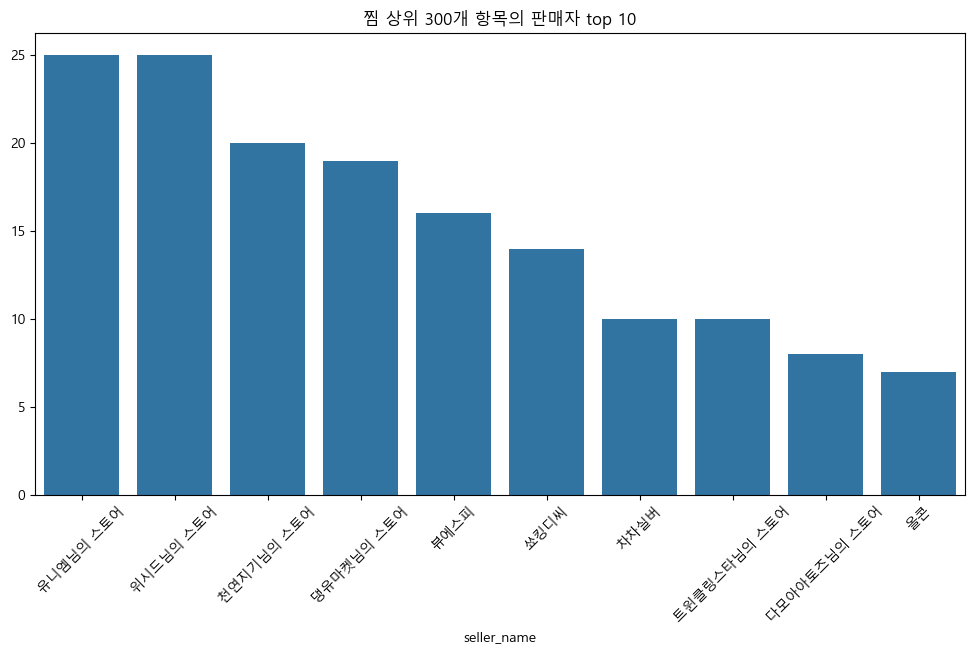

In [14]:

plt.figure(figsize=(12, 6))

sns.barplot(data=snsdraw.to_frame(), x=snsdraw.index,y=snsdraw.values)

plt.title('찜 상위 300개 항목의 판매자 top 10')
plt.xticks(rotation=45)
plt.show()

## 찜 top 50

In [22]:
df_zzimtop50 = df_product.sort_values('zzim',ascending=False)[:50]

In [27]:
df_zzimtop50.query('product_price != "구독특가"')['product_price'].mean()

32712.962962962964

In [30]:
df_zzimtop50

,large_category_name,small_category_name,zzim,product_name,product_price,product_event_price,seller_name
1625,식품,건강식품,235018,휴먼케어 프리미엄 루테인 500mg x 90캡슐,구독특가,할인없음,신라상점
19264,생활용품,주방용품,210630,[무료배송] 쉬젤 엘레강스 스퀘어도마(컷팅보드),구독특가,할인없음,코지어플렌티님의 스토어
6947,디지털/가전,주방가전,209084,[무료배송] 테팔 미니 프리토 튀김기 1L,구독특가,할인없음,코지어플렌티님의 스토어
19265,생활용품,주방용품,199282,[무료배송] 알렌토 스카니아 도자기 홈세트,구독특가,할인없음,코지어플렌티님의 스토어
48527,액세서리,귀걸이/피어싱,147755,농협 침향공력환 60환,구독특가,할인없음,쑈킹디씨
2628,식품,건강식품,147755,농협 침향공력환 60환,구독특가,할인없음,쑈킹디씨
41456,캠핑/레저,캠핑,144842,사계절 확장형 침낭 아웃도어 차박 캠핑 비박 텐트 커플 이불 침낭,33550.0,33064.0,댕유마켓님의 스토어
41519,캠핑/레저,캠핑,144610,접이식 캠핑 수레 다용도 시장 장바구니 쇼핑 핸드 카트 캐리어 웨건,22000.0,21630.0,댕유마켓님의 스토어
2627,식품,건강식품,143970,농협 천년산삼배양근 60ml X 60포,구독특가,할인없음,쑈킹디씨
41581,캠핑/레저,캠핑,143909,2m 3m 대형 피크닉 야외매트 캠핑 돗자리 매트 방수포 텐트 바닥 깔개 돗자리,11000.0,10740.0,댕유마켓님의 스토어


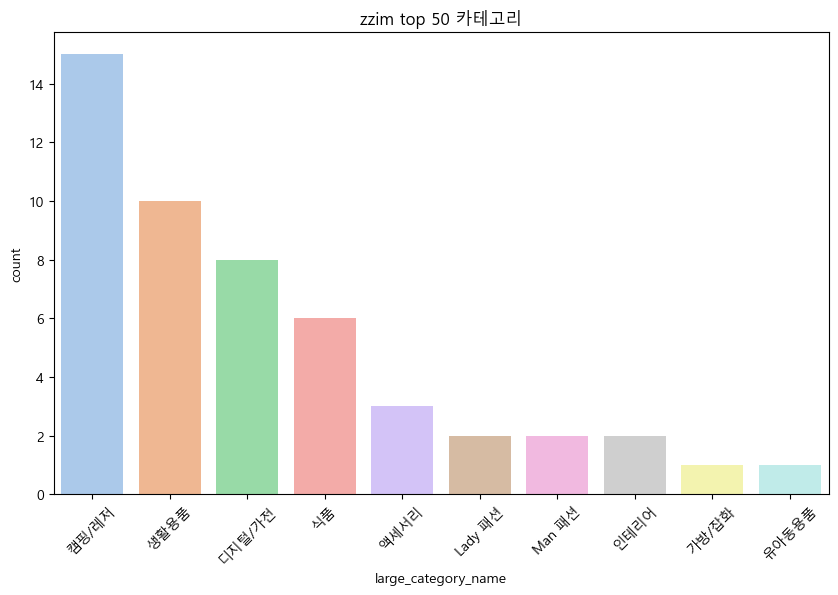

In [34]:
plt.figure(figsize=(10, 6))

zzim_order = df_zzimtop50.value_counts('large_category_name').index

sns.countplot(data=df_zzimtop50, x='large_category_name', order=zzim_order, palette='pastel')

plt.title('zzim top 50 카테고리')
plt.xticks(rotation=45)
plt.show()